My own function: [ 0.48707708 -0.69111259  0.78559889 -1.60128553  1.603179   -0.62212679].
Np.linalg function: [ 0.48707708 -0.69111259  0.78559889 -1.60128553  1.603179   -0.62212679].
Cond A: 4973.555315570857.
Vector d: [0.00136902 0.00594842 0.03081389 0.0540004  0.07937645 0.03151214].


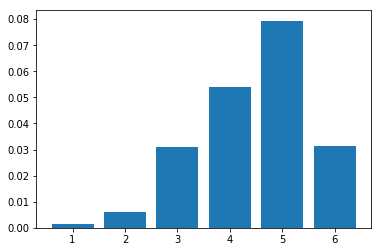

The error with the greatest impact (practical) is 0.07937644813653003.
Theoretical error: 4.973555315570857.
Theoretical error more than practical


In [152]:
import numpy as np
import matplotlib.pyplot as plt
import math

#Вариант 1
#Задачи 3.1.1, 3.5.1, 3.10.1 
#Антонов Алексей

#3.1.1
N = 1
n = 6

def Zeroing_column(arr, x, i, j):
    temp = arr[i, j] / arr[j, j]
    arr[i] -= (arr[j] * temp)
    x[i] -= (x[j] * temp)
    #print(arr)
    #print(x)

def Gauss_method (A, b):
    
    arr = np.copy(A)
    x = np.copy(b)
    
    #print("Front path:")
    [[Zeroing_column(arr, x, i, j) for i in range(j + 1, n)] for j in range(n)]  
    #print("Reverse path:")
    [[Zeroing_column(arr, x, i, j) for i in range(j - 1, -1, -1)] for j in range(n - 1, -1, -1)] 
    
    #result vector
    for i in range (n):
        x[i] /= arr[i, i]
    
    return x

def Create_D_vect(x, b, eps):
    d = np.zeros(n)
    for i in range(n):
        temp_b = np.copy(b)
        temp_b[i] += eps
        x_i = np.linalg.solve(A, temp_b)
        d[i] = max(x - x_i) / max(x)
    return d

c_ij = lambda i, j, N: 0.1 * N * (i + 1) * (j + 1)
function = lambda i, j, N: 15 / (4 * c_ij(i, j, N) ** 5 + 6 * c_ij(i, j, N) + 1)

A = np.array([[function(i, j, N) for j in range(n)] for i in range(n)])
b = np.array([float(N) for i in range(n)])

x1 = Gauss_method(A, b)
eps = 10 ** (-3)
x2 = np.linalg.solve(A, b)
cond = np.linalg.cond(A)
d = Create_D_vect(x1, b, eps)

print("My own function: {}.".format(x1))
print("Np.linalg function: {}.".format(x2))
print("Cond A: {}.".format(cond))
print("Vector d: {}.".format(d))
plt.bar(np.arange(1, n + 1), d)
plt.show()
print("The error with the greatest impact (practical) is {}.".format(max(d)))
print("Theoretical error: {}.".format(cond * eps))
print("Theoretical error " + ("less" if max(d) >= cond * eps else "more") + " than practical")
#Потому что теоретическая погрешность не вычисляется с должной точностью

In [190]:
#3.5.1
n = 40
m = 10

function = lambda i, j: n + m ** 2 + j / m + i / n if i == j else (i + j) / (m + n)

A = np.array([[function(i, j) for j in range(n)] for i in range(n)])
b = np.array([(n * i + m) for i in range(n)])

L = np.linalg.cholesky(A)
L_T = L.transpose()
#L * y = b, L_T * x = y
y = np.linalg.solve(L, b)
x = np.linalg.solve(L_T, y)

print("Vector y: ")
print(y)
print("Vector x:")
print(x)
print("Solve:")
print (np.linalg.solve(A, b))

Vector y: 
[  0.84515425   4.22376539   7.59755811  10.96414293  14.32115324
  17.66625256  20.99714164  24.31156522  27.60731865  30.88225408
  34.13428633  37.36139843  40.56164665  43.73316523  46.87417052
  49.98296477  53.05793939  56.09757774  59.10045744  62.06525223
  64.9907333   67.87577021  70.71933135  73.52048392  76.27839358
  78.99232364  81.6616339   84.28577912  86.86430724  89.39685721
  91.88315662  94.32301904  96.71634125  99.06310013 101.36334952
 103.6172169  105.8249     107.98666321 110.10283415 112.17379996]
Vector x:
[-0.61254795 -0.351742   -0.09125235  0.16892155  0.4287803   0.68832446
  0.94755461  1.2064713   1.46507512  1.72336662  1.98134638  2.23901496
  2.49637291  2.75342081  3.0101592   3.26658866  3.52270973  3.77852298
  4.03402896  4.28922821  4.5441213   4.79870877  5.05299118  5.30696906
  5.56064298  5.81401346  6.06708107  6.31984633  6.57230979  6.824472
  7.07633349  7.32789479  7.57915645  7.830119    8.08078297  8.3311489
  8.58121731  8

In [203]:
#3.10.1
#на главной диагонали элементы равны 1000, на первой
#наддиагонали элементы равны 1, на 3 наддиагонали
#элементы равны 1, на 1 поддиагонали элементы равны 1

n = 5

def function(i, j):
    if (i == j):
        return 1000.0;
    if (abs(i - j) == 1):
        return 1.0;
    if (j - i == 3):
        return 1.0
    return 0

A = np.array([[function(i, j) for j in range(n)] for i in range(n)])
b = np.array([((i + 1) * math.exp(18 / (i + 1))) for i in range(n)])

y, alpha, gamma, betta = np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n)

L = np.linalg.cholesky(A)
print(L)

#y[0] = A[0][0]
#alpha[0] = -A[0][1] / y[0]
#gamma[0] = -A[0][3] / y[0]
#betta[0] = b[0] / y[0]

#for i in range(1, n):
#    alpha[i] = -A[i][i] / y[i - 1]
#    y[i] = b[i]

print (A)
print("Vector y: ")



[[31.6227766   0.          0.          0.          0.        ]
 [ 0.03162278 31.62276079  0.          0.          0.        ]
 [ 0.          0.03162279 31.62276079  0.          0.        ]
 [ 0.          0.          0.03162279 31.62276079  0.        ]
 [ 0.          0.          0.          0.03162279 31.62276079]]
[[1000.    1.    0.    1.    0.]
 [   1. 1000.    1.    0.    1.]
 [   0.    1. 1000.    1.    0.]
 [   0.    0.    1. 1000.    1.]
 [   0.    0.    0.    1. 1000.]]
Vector y: 
